In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

importing necessary libaries

In [206]:
dfc=pd.read_csv("census Income.csv")
dfc

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here the above dataset contain the census data of USA And the Dataset contain classification Problem because the Target
Variable is containing two outcome  "greater than >", "lower than or equals to <="

In [207]:
dfc.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [208]:
dfc.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
29002,27,Private,165519,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [209]:
dfc.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In  the Dataset there is no null value 

In [210]:
dfc1=dfc.drop('Relationship',axis=1,)
dfc1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K


dfc1 is the new dataset which do contain the column name "Relationship" because this column is not require for predicting income

In [211]:
dfc2=dfc1.drop('Capital_gain',axis=1)
dfc2.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_loss,Hours_per_week,Native_country,Income
17370,31,Self-emp-not-inc,312055,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Male,0,70,United-States,<=50K


In [212]:
dfc3=dfc2.drop('Capital_loss',axis=1)
dfc3.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
13917,55,Private,308118,Bachelors,13,Widowed,Machine-op-inspct,White,Female,40,?,<=50K


In dfc2 anddfc3 dataset we drop the column Capital_gain and Capital_loss becuse from my understanding these two column  are not
necessary in Income prediction 

In [213]:
dfc4=dfc3.drop('Fnlwgt',axis=1)
dfc4.sample()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
25301,53,Private,HS-grad,9,Married-civ-spouse,Craft-repair,White,Male,46,United-States,>50K


In [214]:
dfc4.describe()

,Age,Education_num,Hours_per_week
count,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,40.437469
std,13.640642,2.572709,12.347618
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


By the describe method we find there are some Outliners in the dataset 

<Axes: ylabel='Age'>

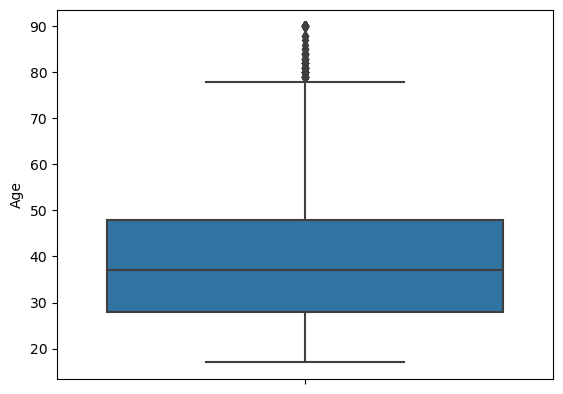

In [215]:
sns.boxplot(y="Age",data=dfc4)

<Axes: ylabel='Education_num'>

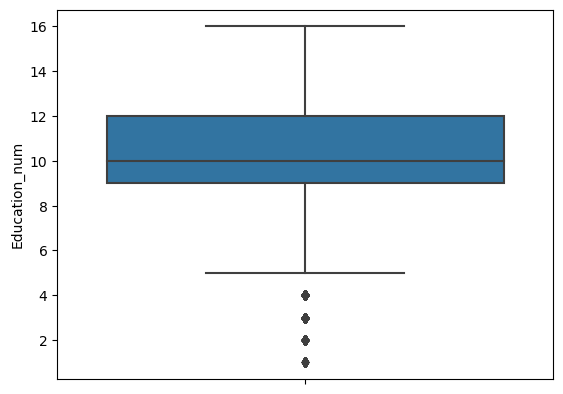

In [216]:
sns.boxplot(y="Education_num",data=dfc4)

<Axes: ylabel='Hours_per_week'>

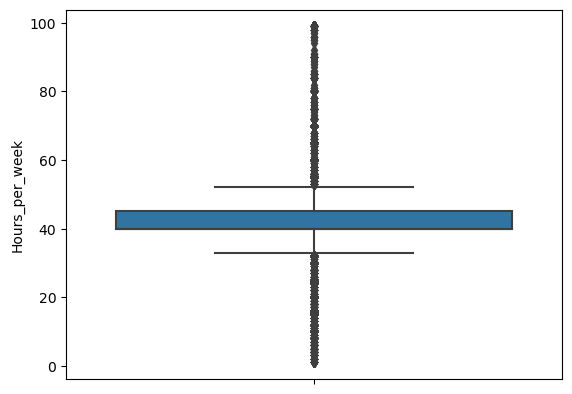

In [217]:
sns.boxplot(y="Hours_per_week",data=dfc4)

By the seaborn lib we can visualise Outliers by boxplot method 

<function matplotlib.pyplot.show(close=None, block=None)>

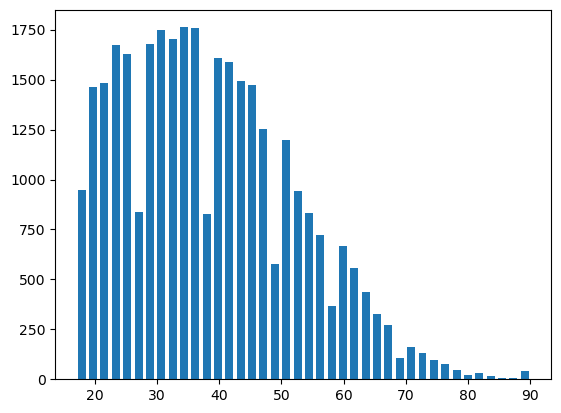

In [218]:
plt.hist(dfc4.Age, bins=40, rwidth=0.7)
plt.xlabel=("Age")
plt.ylable=("Income")
plt.show

there are very less individual in group 17-20 and 70-90 who are getting more or lower/equal to 50000$ in a year

<function matplotlib.pyplot.show(close=None, block=None)>

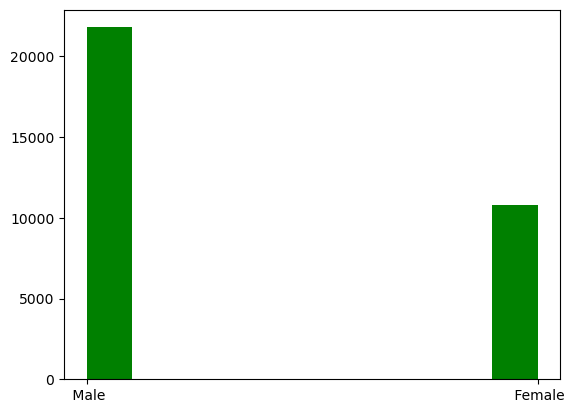

In [219]:
plt.hist(dfc4.Sex,color="green")
plt.xlabel=("sex")
plt.ylable=("Income")
plt.show

In the above histogram there are less female as compare to male in labour force who getting more or less/equale $50000 in 1994 in
U.S.A

<function matplotlib.pyplot.show(close=None, block=None)>

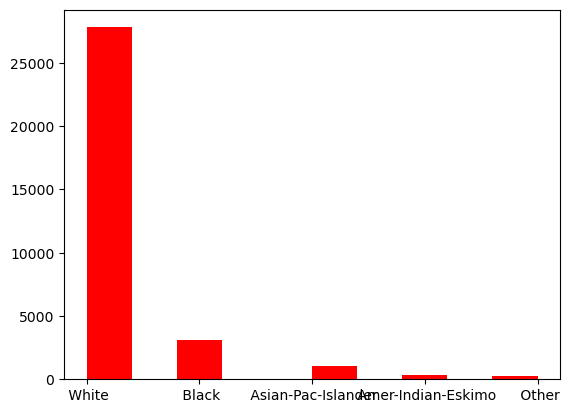

In [220]:
plt.hist(dfc4.Race,color="red")
plt.ylabel=("Race")
plt.xlable=("count")
plt.show

The population of White Race is more than the other Races in U.S.A  

<function matplotlib.pyplot.show(close=None, block=None)>

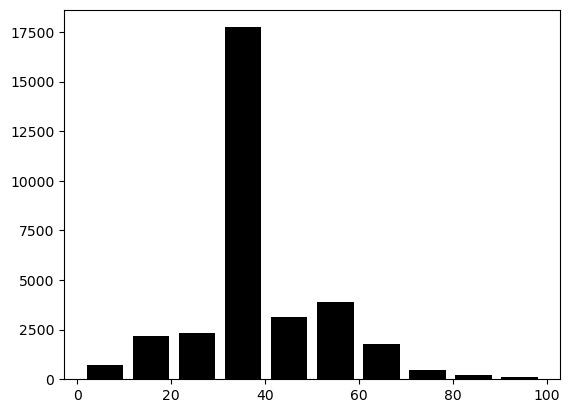

In [221]:
plt.hist(dfc4.Hours_per_week,color="black",bins=10,rwidth=0.8)
plt.xlabel=("Hours_per_week")
plt.ylable=("Income")
plt.show

Here the most of the population is working between 30-40 hour per week 

In [222]:
dfc4.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K


In [223]:
dfc4.shape

(32560, 11)

In [224]:
dfc4.describe()

,Age,Education_num,Hours_per_week
count,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,40.437469
std,13.640642,2.572709,12.347618
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


In [225]:
Q1 = dfc4.Age.quantile(0.25)
Q3 = dfc4.Age.quantile(0.75)
Q1 ,Q3

(28.0, 48.0)

In [226]:
IQR = Q3 - Q1
IQR

20.0

In [227]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit , upper_limit

(-2.0, 78.0)

In [228]:
dfc4[(dfc4.Age<lower_limit) |(dfc4.Age>upper_limit)]

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
73,79,Private,Some-college,10,Married-civ-spouse,Prof-specialty,White,Male,20,United-States,<=50K
221,90,Private,HS-grad,9,Never-married,Other-service,Black,Male,40,United-States,<=50K
429,80,?,HS-grad,9,Widowed,?,White,Male,24,United-States,<=50K
917,81,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Male,30,United-States,<=50K
1039,90,Private,HS-grad,9,Never-married,Other-service,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32276,90,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,25,United-States,<=50K
32366,90,Local-gov,7th-8th,4,Married-civ-spouse,Protective-serv,White,Male,40,United-States,<=50K
32458,85,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,3,Poland,<=50K
32493,82,?,HS-grad,9,Never-married,?,White,Male,3,United-States,<=50K


In [229]:
Q2 = dfc4.Hours_per_week.quantile(0.25)
Q4 = dfc4.Hours_per_week.quantile(0.75)
Q2 ,Q4

(40.0, 45.0)

In [230]:
IQR_1 = Q4 - Q2
IQR_1

5.0

In [231]:
lower_limit_1 = Q2 - 1.5*IQR_1
upper_limit_1 = Q4 + 1.5*IQR_1
lower_limit_1 , upper_limit_1

(32.5, 52.5)

In [232]:
dfc4[(dfc4.Hours_per_week<lower_limit) |(dfc4.Hours_per_week>upper_limit)]

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
9,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Black,Male,80,United-States,>50K
27,39,Private,HS-grad,9,Divorced,Exec-managerial,White,Male,80,United-States,<=50K
271,50,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,White,Male,98,United-States,<=50K
298,38,Private,HS-grad,9,Divorced,Sales,White,Male,80,United-States,<=50K
519,38,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...
32390,55,Private,HS-grad,9,Separated,Protective-serv,White,Male,81,United-States,<=50K
32401,42,Private,Some-college,10,Married-civ-spouse,Craft-repair,White,Male,89,United-States,>50K
32468,58,Self-emp-inc,Doctorate,16,Never-married,Prof-specialty,White,Female,99,?,<=50K
32475,35,Private,12th,8,Married-civ-spouse,Craft-repair,White,Male,84,United-States,<=50K


In [233]:
Q3 = dfc4.Education_num.quantile(0.25)
Q6 = dfc4.Education_num.quantile(0.75)
Q3 ,Q6

(9.0, 12.0)

In [234]:
IQR_2 = Q6 - Q3
IQR_2

3.0

In [235]:
lower_limit_2 = Q3 - 1.5*IQR_2
upper_limit_2 = Q6 + 1.5*IQR_2
lower_limit_2 , upper_limit_2

(4.5, 16.5)

In [236]:
dfc4[(dfc4.Education_num<lower_limit) |(dfc4.Education_num>upper_limit)]


,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income


In [237]:
dfc5 = dfc4[(dfc4.Age>lower_limit) & (dfc4.Age<upper_limit)]
dfc5 = dfc4[(dfc4.Hours_per_week>lower_limit_1) & (dfc4.Hours_per_week<upper_limit_1)]
dfc5 = dfc4[(dfc4.Education_num>lower_limit_2) & (dfc4.Education_num<upper_limit_2)]
dfc5

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,38,United-States,<=50K
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,40,United-States,>50K
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,White,Female,40,United-States,<=50K
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,White,Male,20,United-States,<=50K


In above dataset we Remove 1,198 Outlier rows  by IQR Method 

In [238]:
le = LabelEncoder()
dfc5["Workclass"]=le.fit_transform(dfc5["Workclass"])

dfc5["Education"]=le.fit_transform(dfc5["Education"])

dfc5["Marital_status"]=le.fit_transform(dfc5["Marital_status"])

dfc5["Occupation"]=le.fit_transform(dfc5["Occupation"])

dfc5["Race"]=le.fit_transform(dfc5["Race"])

dfc5["Sex"]=le.fit_transform(dfc5["Sex"])

dfc5["Native_country"]=le.fit_transform(dfc5["Native_country"])

dfc5["Income"]=le.fit_transform(dfc5["Income"])
dfc5

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,6,13,2,4,4,1,13,39,0
1,38,4,8,9,0,6,4,1,40,39,0
2,53,4,1,7,2,6,2,1,40,39,0
3,28,4,6,13,2,10,2,0,40,5,0
4,37,4,9,14,2,4,4,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,4,12,2,13,4,0,38,39,0
32556,40,4,8,9,2,7,4,1,40,39,1
32557,58,4,8,9,6,1,4,0,40,39,0
32558,22,4,8,9,4,1,4,1,20,39,0


Here we are performing encoding technique to tranform the str data in numerical data which is understand by our machine learning
model

In [239]:
x= dfc5.drop("Income",axis=1)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Race,Sex,Hours_per_week,Native_country
0,50,6,6,13,2,4,4,1,13,39
1,38,4,8,9,0,6,4,1,40,39
2,53,4,1,7,2,6,2,1,40,39
3,28,4,6,13,2,10,2,0,40,5
4,37,4,9,14,2,4,4,0,40,39
...,...,...,...,...,...,...,...,...,...,...
32555,27,4,4,12,2,13,4,0,38,39
32556,40,4,8,9,2,7,4,1,40,39
32557,58,4,8,9,6,1,4,0,40,39
32558,22,4,8,9,4,1,4,1,20,39


Here we are seperating the data between x And y .x contain only independent variable and y contain the dependent/Target 
variable 

In [240]:
y=dfc5.Income
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31362, dtype: int32

Here 0 represent the <= and 1 represent >

In [241]:
dfc5["Income"].value_counts()

0    23583
1     7779
Name: Income, dtype: int64

From the above value_count function we find that the value of 0 is much greater than the value of 1  so they are imbalance 

pip install imbalanced-learn

In [242]:
from imblearn.over_sampling import SMOTE

To balance the above we require the SMOTE function to balance the value count of 0 and 1

In [243]:
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)

In [244]:
train_y.value_counts()

0    23583
1    23583
Name: Income, dtype: int64

In [245]:
train_x.value_counts()

Age  Workclass  Education  Education_num  Marital_status  Occupation  Race  Sex  Hours_per_week  Native_country
47   4          8          9              2               3           4     1    40              39                56
50   4          8          9              2               3           4     1    40              39                54
43   4          8          9              2               3           4     1    40              39                48
53   4          8          9              2               3           4     1    40              39                38
35   4          8          9              2               3           4     1    40              39                34
                                                                                                                   ..
34   5          8          9              2               3           4     1    54              0                  1
                                                              

In [246]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=45)

In [247]:
train_x.shape

(25089, 10)

In [248]:
train_y.shape

(25089,)

In [249]:
test_x.shape

(6273, 10)

In [250]:
test_y.shape

(6273,)

In [251]:
gnb = GaussianNB()
gnb.fit(train_x, train_y)


GaussianNB()

In [252]:
predict=gnb.predict(test_x)

In [253]:
predict

array([1, 0, 0, ..., 0, 0, 0])

In [254]:
print(accuracy_score(test_y,predict))

0.8000956480153036


In [255]:
print(confusion_matrix(test_y,predict))

[[3991  748]
 [ 506 1028]]


In [256]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4739
           1       0.58      0.67      0.62      1534

    accuracy                           0.80      6273
   macro avg       0.73      0.76      0.74      6273
weighted avg       0.81      0.80      0.80      6273



In [257]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x,train_y)

In [258]:
pred=clf.predict(test_x)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [259]:
print(accuracy_score(test_y,pred))

0.7825601785429619


In [260]:
print(confusion_matrix(test_y,pred))

[[4076  663]
 [ 701  833]]


In [261]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4739
           1       0.56      0.54      0.55      1534

    accuracy                           0.78      6273
   macro avg       0.71      0.70      0.70      6273
weighted avg       0.78      0.78      0.78      6273



In [262]:
bb=SVC()
bb=bb.fit(train_x,train_y)

In [263]:
predict = bb.predict(test_x)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [264]:
print(accuracy_score(test_y,pred))

0.7825601785429619


In [265]:
print(confusion_matrix(test_y,pred))

[[4076  663]
 [ 701  833]]


In [266]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4739
           1       0.56      0.54      0.55      1534

    accuracy                           0.78      6273
   macro avg       0.71      0.70      0.70      6273
weighted avg       0.78      0.78      0.78      6273



In [267]:
knc = KNeighborsClassifier()

In [268]:
knc = knc.fit(train_x,train_y)

In [269]:
pre = knc.predict(test_x)
pre

array([0, 0, 0, ..., 0, 0, 0])

In [270]:
print(accuracy_score(test_y,pred))

0.7825601785429619


In [271]:
print(confusion_matrix(test_y,pred))

[[4076  663]
 [ 701  833]]


In [272]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4739
           1       0.56      0.54      0.55      1534

    accuracy                           0.78      6273
   macro avg       0.71      0.70      0.70      6273
weighted avg       0.78      0.78      0.78      6273



In [273]:
from sklearn.model_selection import cross_val_score

In [274]:
score = cross_val_score(gnb,x,y,cv=18)
print(score)
print(score.mean())
print(score.std())

[0.78886976 0.79804934 0.794607   0.78944349 0.80263913 0.78313253
 0.7967853  0.78645235 0.79391504 0.7967853  0.78243398 0.80309989
 0.79104478 0.80080367 0.78817451 0.80884041 0.78874856 0.80367394]
0.794305500023896
0.00735728671148289


In [275]:
score = cross_val_score(clf,x,y,cv=18)
print(score)
print(score.mean())
print(score.std())

[0.76649455 0.77854274 0.767642   0.78026391 0.77567413 0.75043029
 0.77669346 0.78300804 0.78530425 0.78185993 0.76061998 0.77956372
 0.79621125 0.78358209 0.78530425 0.78760046 0.76980482 0.78128588]
0.7772158742307995
0.010502253218426459


In [276]:
score = cross_val_score(knc,x,y,cv=18)
print(score)
print(score.mean())
print(score.std())

[0.78255881 0.79977051 0.78657487 0.78255881 0.79919679 0.78026391
 0.78415614 0.7858783  0.81056257 0.79161883 0.79161883 0.79161883
 0.79448909 0.80252583 0.7967853  0.80080367 0.77095293 0.78932262]
0.7911809247450319
0.009300791830459187


In [277]:
def predictgnbf(d):
    d=d.reshape(1,-1)
    pred=gnb.predict(d)
    print("Income=",pred)

In [278]:
d=np.array([27,4,4,12,2,13,4,0,38,39])
predictgnbf(d)

Income= [0]


From the above analysis I recommend gnb model  is giving best results 